# Implementation of ConvNets
-------------------------------------
In this project, I'm making an image classification model that differentiates between images of "Barbie" and "Ken" (later it will be downloaded as "Ken barbie doll" because if I use "Ken", it will show up Ken the baseball player). Since the model only has two distinct categories: Barbie and Ken, it is a binary classification. I chose Barbie and Ken because barbie was my favorite doll as a kid.

By training and evaluating a ConvNets, I want to build a robust model that can distinguish between Barbie and Ken Barbie Doll images. The success of this model will depend on factors such as the quality of the images, the architecture of the model, and potential techniques like data augmentation. The aim is to create a reliable and accurate model for classification of these dolls based on the images provided.

This script is utilizing ConvNet Model with data agumentation.
The f1 score is 0.79 for this model.


In [ ]:
import keras
keras.__version__

'2.13.1'

In [ ]:
from six import BytesIO # provides an in-memory binary stream that is often used to work with binary data as if it were a file
from PIL import Image # provides functionality for opening, manipulating, and saving image files in various formats.
import numpy as np
import glob # used for pattern matching and file searching. It's often used to find files that match a specified pattern, such as searching for all image files in a directory.
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
import os # operating system. working with files and directories, creating and removing directories, and etc.
import random # to shuffle the order of image filenames, making the dataset more diverse and reducing any potential bias
import shutil # provides a higher-level interface for file operations. (file copying, moving, and removal)

# Download images and partition of each class

## Download 100 + images of each class

In [ ]:
!pip install bing-image-downloader # allows me to download images from Bing search engine.
!mkdir images # mkdir = make directory. creates a new directory (folder) named "images" in the current working directory.

I found that when I tried limit = 100, it doesn't necessarily download 100 images. A lot of times it downloads only 30 or 40 images. So I made three different codes of each category and merged the images as one folder. Below is my code.

In [ ]:
from bing_image_downloader import downloader # the barbie is downloaded to images folder as 'barbie' now
downloader.download("barbie", limit=50, output_dir='images', adult_filter_off=True, force_replace=False) # download the image to 'images' directory

[%] Downloading Images to /content/images/barbie


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from https://m.media-amazon.com/images/S/aplus-media/vc/945cc36b-118f-42d2-9c13-de0408af94c3.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://www.desicomments.com/wp-content/uploads/2017/02/Cute-Barbie-Image.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://images4.fanpop.com/image/photos/21100000/barbie-hq-photos-barbie-21130522-640-950.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://www.hoodedutilitarian.com/wp-content/uploads/2015/02/bcp89_c_14_M.png
[%] File Downloaded !

[%] Downloading Image #5 from https://i5.walmartimages.com/asr/795f7322-38b0-4dca-9bcb-db927438d05d.da08ce26cc19a9a3dc358de8c5eb9a0e.jpeg
[%] File Downloaded !

[%] Downloading Image #6 from http://images4.fanpop.com/image/photos/21100000/barbie-big-photos-barbie-21130687-640-950.jpg
[%] File Downloaded !

[%] Downloading Image #7 from htt

In [ ]:
# try another barbie
downloader.download("barbie doll", limit= 50, output_dir='images', adult_filter_off=True, force_replace=False)

[%] Downloading Images to /content/images/barbie doll


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from http://images6.fanpop.com/image/photos/43200000/Barbie-Princess-Adventure-Barbie-Doll-barbie-movies-43210425-1440-1440.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.barbie-collectible.com/wp-content/uploads/2017/03/Barbie-Collector-2015-Holiday-Caucasian-Doll-1.jpg
[!] Issue getting: https://www.barbie-collectible.com/wp-content/uploads/2017/03/Barbie-Collector-2015-Holiday-Caucasian-Doll-1.jpg
[!] Error:: HTTP Error 520: 
[%] Downloading Image #2 from https://www.perfectory.com/wp-content/gallery/blush-fringed-gown/DWF52_04.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.desicomments.com/wp-content/uploads/2017/07/Barbie-Doll-Photo-.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.desicomments.com/wp-content/uploads/2017/02/Cute-Barbie-Doll.jpg
[%] File Downloaded !

[%] Downloadin

In [ ]:
# try the other barbie
downloader.download("barbie dolls", limit=50, output_dir='images', adult_filter_off=True, force_replace=False)

[%] Downloading Images to /content/images/barbie dolls


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from http://2.bp.blogspot.com/-zpl4jahIr6s/TmjhR-wbYDI/AAAAAAAAABA/EVot1iMterw/s1600/QuintessentialBarbie.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://2.bp.blogspot.com/-TZdJTDCzYs0/UJ5ioXyUZXI/AAAAAAAAHmk/Lh2bGuRCQH4/s1600/42.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://4.bp.blogspot.com/-lc7dS6nQB5Q/UFFSlj16wBI/AAAAAAACjq8/rEKpw470Xeg/s1600/original+Pink+diamond+barbie+doll.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://3.bp.blogspot.com/-7o60VAqNpI4/T7fEkkziqFI/AAAAAAAAC_Q/1543-Ig3EIg/s1600/3jluecl7v1ii.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.barbie-collectible.com/wp-content/uploads/2017/03/Barbie-Collector-2015-Holiday-Caucasian-Doll-1.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://papusilemele.com/en/wp-content/uploads/Barbie-Endless-Hair-Kingd

In [ ]:
# now I am going to merge the barbies into one final "Barbie" folder that will be into the model.

import shutil

# set the source directories for the downloaded images
source_directories = ["images/barbie", "images/barbie doll", "images/barbie dolls"]

# directory to merge the images into
merged_directory = "images/Barbie"

# create the merged directory if it doesn't exist
os.makedirs(merged_directory, exist_ok=True)

# Merge the images into the "Barbie" directory
for source_dir in source_directories:
    image_files = os.listdir(source_dir) # make a list directory of source_directories
    for image_file in image_files:
        source_path = os.path.join(source_dir, image_file)
        target_path = os.path.join(merged_directory, image_file)
        shutil.move(source_path, target_path) # to move the image from the source directory to the merged directory. move the source to target.

# Now, all images from the different categories are merged into the "Barbie" directory

Doing the same thing to Ken, another category.

In [ ]:
downloader.download("Ken Barbie Doll", limit=50, output_dir='images', adult_filter_off=True, force_replace=False) # if I use "Ken" itself, it will show up baseball player Ken Griffey.. which is not what I meant.
# force_replace=False: If an image with the same name already exists in the "images" directory, the downloader will not download and replace that image. It will simply skip it and move on to the next image in the search results.

[%] Downloading Images to /content/images/Ken Barbie Doll


[!!]Indexing page: 1

[%] No more images are available


[%] Done. Downloaded 0 images.


In [ ]:
downloader.download("Ken Ken Barbie Doll", limit=50, output_dir='images', adult_filter_off=True, force_replace=False)

[%] Downloading Images to /content/images/Ken Ken Barbie Doll


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from https://i.etsystatic.com/10691624/r/il/705c10/928381177/il_794xN.928381177_7wjn.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.youloveit.com/uploads/posts/2021-03/1614879445_youloveit_com_barbie_60th_anniversary_silksone_doll05.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.gannett-cdn.com/presto/2021/03/08/USAT/8bb25fcc-19e3-4b18-bcd7-a06580cd3ad3-G000_C_2021_242.jpg?crop=2571,1446,x0,y138&amp;width=2571&amp;height=1446&amp;format=pjpg&amp;auto=webp
[%] File Downloaded !

[%] Downloading Image #4 from https://i5.walmartimages.com/asr/b1292196-b9df-4c1e-a236-e1ed4077bf48_1.4a90928488305bcc452c7c03f2fba352.jpeg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.youloveit.com/uploads/posts/2020-01/1579296354_youloveit_com_barbie_princess_adventure_ken_doll_2020.jpg
[%] File Download

In [ ]:
downloader.download("Ken Doll", limit=50, output_dir='images', adult_filter_off=True, force_replace=False)

[%] Downloading Images to /content/images/Ken Doll


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from https://m.media-amazon.com/images/S/aplus-media/mg/331b6500-e581-4990-a7f2-62084290c3be.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i5.walmartimages.com/asr/b4ada9fe-0601-4ac7-bcc6-0911477bcf87_1.2c5fe60f4e429c709a9fc2971bb58da6.jpeg
[%] File Downloaded !

[%] Downloading Image #3 from https://bloximages.chicago2.vip.townnews.com/ravallirepublic.com/content/tncms/assets/v3/editorial/a/26/a26d602e-73f2-526f-8394-4615a64c62c8/5949747ae7ec0.image.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://simplywallpaper.net/pictures/2010/07/16/wp3_ken_ts3_1600x1200.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://bloximages.chicago2.vip.townnews.com/santamariatimes.com/content/tncms/assets/v3/editorial/d/4a/d4a73c69-16c7-534b-9702-a79449942c6a/594975c8e9476.image.jpg
[%] File Downloaded !

[%] Downloading Imag

In [ ]:
# merging as one "Ken" folder

# Set the source directories for the downloaded images
source_directories = ["images/Ken Barbie Doll", "images/Ken Ken Barbie Doll", "images/Ken Doll"]

# Directory to merge the images into
merged_directory = "images/Ken"

# Create the merged directory if it doesn't exist
os.makedirs(merged_directory, exist_ok=True)

# Merge the images into the "Barbie" directory
for source_dir in source_directories:
    image_files = os.listdir(source_dir)
    for image_file in image_files:
        source_path = os.path.join(source_dir, image_file)
        target_path = os.path.join(merged_directory, image_file)
        shutil.move(source_path, target_path)

# Now, all images from the different categories are merged into the "Ken" directory


In [ ]:
def load_image_into_numpy_array(path): #  takes a file path as an argument and returns an image in the form of a NumPy array.
  img_data = open(path, 'rb').read() # 'rb' means read binary. It loads the binary content of an image file into img_data.
  image = Image.open(BytesIO(img_data)) # img_data is opened and converted into a PIL (Python Imaging Library) Image object.
  (im_width, im_height) = image.size # extracts the width and height of the image in pixels and stores them in the im_width and im_height variables.
  return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8) # Converts the data type of the NumPy array to unsigned 8-bit integers (uint8), which is a common data type for image pixel values.

Now make the images to numpy so that I can use it to model. Some file format does not convert to numpy, so I need to remove the file. (.png does not convert to numpy)

In [ ]:
# check barbie and drop .png format
barbie_image_path = "/content/images/Barbie/*"
barbie_images_np = []
for iname in glob.glob(barbie_image_path):
  try:
    barbie_images_np.append(load_image_into_numpy_array(iname))
  except:
    print('An error occured for an image', iname)
    os.remove(iname)

An error occured for an image /content/images/Barbie/Image_10.png
An error occured for an image /content/images/Barbie/Image_4.png
An error occured for an image /content/images/Barbie/Image_24.png
An error occured for an image /content/images/Barbie/Image_23.png
An error occured for an image /content/images/Barbie/Image_28.png
An error occured for an image /content/images/Barbie/Image_42.png


In [ ]:
# check ken and drop .png format
ken_image_path = "/content/images/Ken/*"
ken_images_np = []
for iname in glob.glob(ken_image_path):
  try:
    ken_images_np.append(load_image_into_numpy_array(iname))
  except:
    print('An error occured for an image', iname)
    os.remove(iname)

An error occured for an image /content/images/Ken/Image_13.png


## Train/ Validation partition

Before partition, I need to make directories first named as 'train' and 'validation' so that I can move imagest to the directories accordingly.

In [ ]:
# Define the base directory for your dataset
base_dir = 'dataset'
if not os.path.exists(base_dir):
    os.mkdir(base_dir) # if not already exists, make directory "base_dir"

# Create directories for 'Barbie' and 'Ken' classes
classes = ['Barbie', 'Ken']
for class_name in classes:
    train_dir = os.path.join(base_dir, 'train', class_name) # make train directory that includes Barbie and Ken
    validation_dir = os.path.join(base_dir, 'validation', class_name) # make validation directory that includes Barbie and Ken

    # Check if the directories already exist; if not, create them
    if not os.path.exists(train_dir):
        os.makedirs(train_dir)
    if not os.path.exists(validation_dir):
        os.makedirs(validation_dir)

In [ ]:
# now it is time to move the images to the partition.

for class_name in classes:
    images_dir = os.path.join('images', class_name)
    image_files = os.listdir(images_dir)
    random.shuffle(image_files) # shuffle the image

    train_split = int(0.8 * len(image_files)) # train 80%
    validation_split = int(0.2 * len(image_files)) # validation 20%

    train_files = image_files[:train_split]
    validation_files = image_files[train_split:]

    # Move the files to their respective directories
    for filename in train_files:
        src = os.path.join(images_dir, filename)
        dst = os.path.join(base_dir, 'train', class_name, filename)
        shutil.copy(src, dst)

    for filename in validation_files:
        src = os.path.join(images_dir, filename)
        dst = os.path.join(base_dir, 'validation', class_name, filename)
        shutil.copy(src, dst)

# Fit a ConvNet model

## Builing network

I am going to make two convolutional layers because the model does not have a lot of images to fit. A lot of layers actually result in less accuracy. I will keep it simple.

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', # 32 filters of 3*3 size
                        input_shape=(150, 150, 3))) # input data is RGB and 150*150 pixels
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) # use sigmoid because it is a binary classification problem, we are ending the network with a single unit

In [ ]:
# check the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

For the compilation step, I'm using Adam as optimizer because of its ability to adapt the learning rates for each parameter based on the past gradients. Since the network end with a single sigmoid unit, I will use binary crossentropy as our loss. metrics as accuracy.

In [ ]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

## Data preprocessing

In [ ]:
# define path
path = "/content/dataset/"
train_dir = path + "train"
validation_dir = path + "validation"

Keras has ImageDataGenerator which allows to quickly set up Python generators that can automatically turn image files on disk into batches of pre-processed tensors.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255) # normalized by dividing it to 255 which is the max pixel value
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150), # if there is any other value that isnt 150*150, that will be reshaped to 150*150
        batch_size=5, # 5 random images, probably with replacement
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=5,
        class_mode='binary')

Found 84 images belonging to 2 classes.
Found 22 images belonging to 2 classes.


Because the data is being generated endlessly, the generator needs to know example how many samples to draw from the generator before declaring an epoch over. This is the role of the steps_per_epoch argument: after having drawn steps_per_epoch batches from the generator, i.e. after having run for steps_per_epoch gradient descent steps, the fitting process will go to the next epoch.

In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (5, 150, 150, 3)
labels batch shape: (5,)


In [ ]:
# check batch
labels_batch

array([0., 0., 1., 1., 1.], dtype=float32)

When using fit_generator, one may pass a validation_data argument, much like with the fit method. Importantly, this argument is allowed to be a data generator itself, but it could be a tuple of Numpy arrays as well. If you pass a generator as validation_data, then this generator is expected to yield batches of validation data endlessly, and thus you should also specify the validation_steps argument, which tells the process how many batches to draw from the validation generator for evaluation.

In [ ]:
import time

start = time.time()
num_images_train = len(list(train_generator.filepaths))
num_images_val = len(list(validation_generator.filepaths))


history = model.fit(
      train_generator,
      steps_per_epoch = num_images_train // train_generator.batch_size, # ideally...len(trainX) // BS
      epochs=10,
      validation_data=validation_generator,
      validation_steps= num_images_val // validation_generator.batch_size)  # ideally...len(valX) // BS

end = time.time()
print(end - start)

Epoch 1/10
16/16 [==============================] - 16s 918ms/step - loss: 2.4646 - acc: 0.4177 - val_loss: 0.6946 - val_acc: 0.5000
Epoch 2/10
16/16 [==============================] - 14s 890ms/step - loss: 0.6917 - acc: 0.5190 - val_loss: 0.8065 - val_acc: 0.5000
Epoch 3/10
16/16 [==============================] - 15s 959ms/step - loss: 0.7989 - acc: 0.6582 - val_loss: 0.6727 - val_acc: 0.6000
Epoch 4/10
16/16 [==============================] - 15s 942ms/step - loss: 0.6401 - acc: 0.6709 - val_loss: 0.7677 - val_acc: 0.5000
Epoch 5/10
16/16 [==============================] - 14s 894ms/step - loss: 0.5879 - acc: 0.7848 - val_loss: 0.5954 - val_acc: 0.8500
Epoch 6/10
16/16 [==============================] - 14s 892ms/step - loss: 0.5392 - acc: 0.8101 - val_loss: 0.5871 - val_acc: 0.8000
Epoch 7/10
16/16 [==============================] - 14s 895ms/step - loss: 0.4500 - acc: 0.7975 - val_loss: 0.5188 - val_acc: 0.8000
Epoch 8/10
16/16 [==============================] - 14s 890ms/step - 

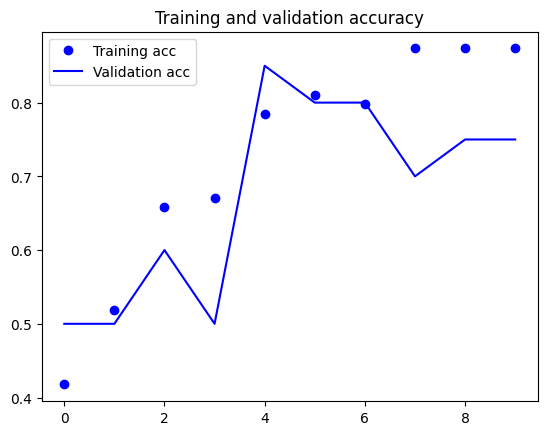

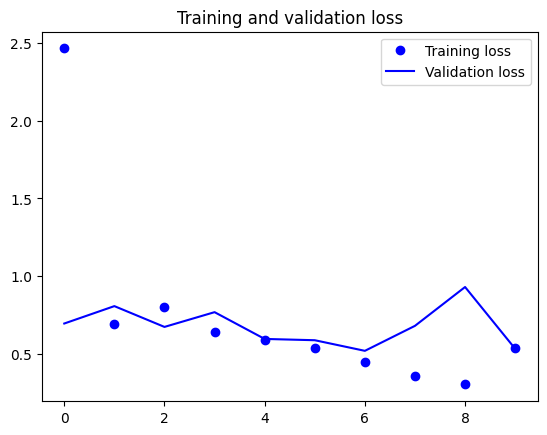

In [ ]:
# check the result real quick
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

This is overfitting A LOT!!! Well, my training samples are very small (about 160 samples) so it is expected to have an overfitting problem. Would data augmentation help reducing overfit? Let's see.

## Data augmentation to mitigate overfitting

Data augmentation takes the approach of generating more training data from existing training samples, by "augmenting" the samples via a number of random transformations that yield believable-looking images. The goal is that at training time, our model would never see the exact same picture twice. This helps the model get exposed to more aspects of the data and generalize better.

In Keras, this can be done by configuring a number of random transformations to be performed on the images read by our ImageDataGenerator instance.

In [ ]:
# this is data augmentation
datagen = ImageDataGenerator(
      rotation_range=40, # rotating 40 degrees randomly / value in degrees (0-180), a range within which to randomly rotate pictures.
      width_shift_range=0.2, # ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
      height_shift_range=0.2, # ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
      shear_range=0.4, # twisting 40%
      zoom_range=0.2, # zomming in and out by 20%
      horizontal_flip=True, # upside down sometimes
      fill_mode='nearest')

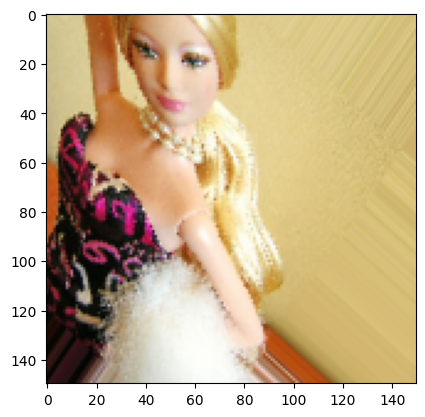

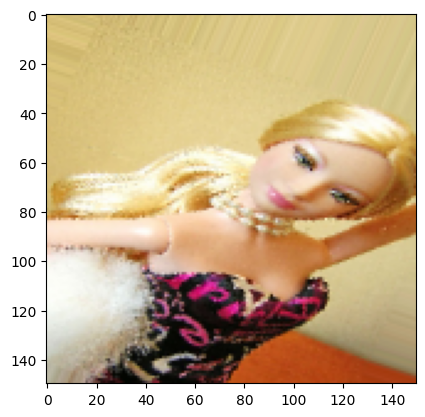

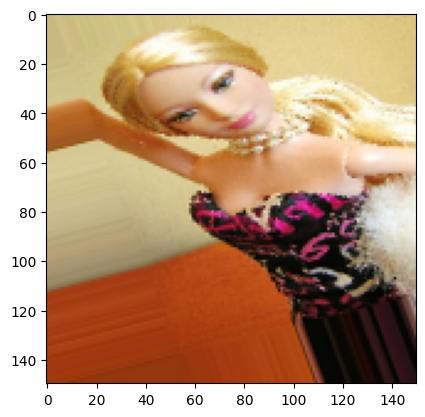

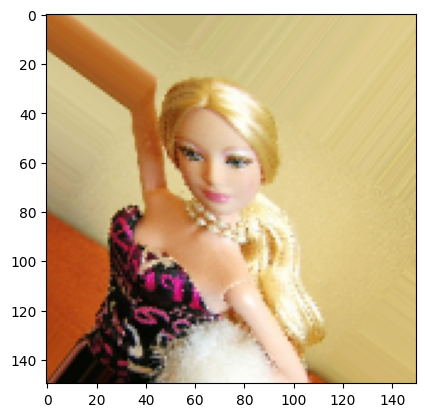

In [ ]:
# take a quick look with augmentation
# This is module with image preprocessing utilities
from keras.preprocessing import image
from google.colab import files

# We pick one image to "augment"
# this was defined above
img_path = train_dir + '/Barbie/Image_10.jpg'

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

If we train a new network using this data augmentation configuration, our network will never see twice the same input. However, the inputs that it sees are still heavily intercorrelated, since they come from a small number of original images -- we cannot produce new information, we can only remix existing information. As such, this might not be quite enough to completely get rid of overfitting. To further fight overfitting, we will also add a Dropout layer to our model, right before the densely-connected classifier:

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

Let's train our network using data augmentation and dropout:

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Note that the validation data should not be augmented!! only to training data.
# we simply scale it by the max value (255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=5,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=5,
        class_mode='binary')

num_images_train = len(list(train_generator.filepaths))
num_images_val = len(list(validation_generator.filepaths))

history = model.fit(
      train_generator,
      steps_per_epoch=num_images_train // train_generator.batch_size,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=num_images_val // validation_generator.batch_size)

Found 84 images belonging to 2 classes.
Found 22 images belonging to 2 classes.
Epoch 1/10
16/16 [==============================] - 15s 918ms/step - loss: 0.7021 - acc: 0.4810 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 2/10
16/16 [==============================] - 14s 899ms/step - loss: 0.7057 - acc: 0.4557 - val_loss: 0.6985 - val_acc: 0.5000
Epoch 3/10
16/16 [==============================] - 17s 1s/step - loss: 0.6867 - acc: 0.5570 - val_loss: 0.6906 - val_acc: 0.5455
Epoch 4/10
16/16 [==============================] - 15s 911ms/step - loss: 0.6802 - acc: 0.5316 - val_loss: 0.6830 - val_acc: 0.7273
Epoch 5/10
16/16 [==============================] - 15s 890ms/step - loss: 0.6960 - acc: 0.6962 - val_loss: 0.9248 - val_acc: 0.5000
Epoch 6/10
16/16 [==============================] - 15s 910ms/step - loss: 0.6826 - acc: 0.5316 - val_loss: 0.6435 - val_acc: 0.6818
Epoch 7/10
16/16 [==============================] - 16s 970ms/step - loss: 0.6661 - acc: 0.5823 - val_loss: 0.6542 - val_acc:

Let's plot our results again:

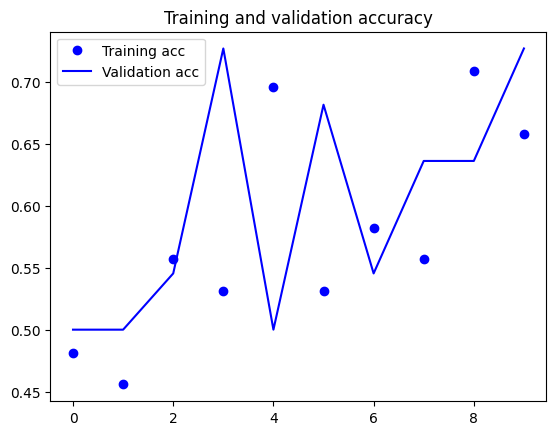

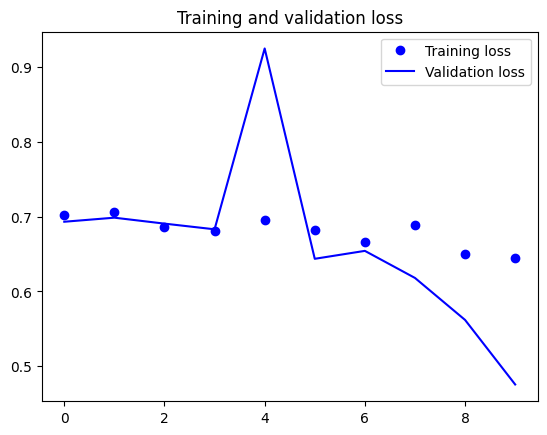

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Thanks to data augmentation, we are no longer overfitting: accuracy score itself may not better than before, as before augmentation val accuracy was about 75% now it is 72%

# Evaluate the ConvNet model

In [ ]:
# for simplicity, let's just round
# you are welcome to try finding an optimal cut-off on your own
import numpy as np
tmp = model.predict(validation_generator) # generator is acting randomly as you run it everytime.
print(tmp.shape)
print(tmp[0:5])
pred = np.round(tmp,0)
print(pred.shape)
print(pred[0:5])

5/5 [==============================] - 1s 189ms/step
(22, 1)
[[0.8365858 ]
 [0.35584244]
 [0.49715993]
 [0.8978991 ]
 [0.5714729 ]]
(22, 1)
[[1.]
 [0.]
 [0.]
 [1.]
 [1.]]


In [ ]:
validation_generator.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

Generators are hard to work with! You need to extract both the label and prediction at once - otherwise order is comprimised.

In [ ]:
def flatten(l):
    return [item for sublist in l for item in sublist]

In [ ]:
import pandas as pd

# Define column names as a list
column_names = ['actual', 'pred']
num_images = len(list(validation_generator.filepaths))
steps_per_epoch = num_images // validation_generator.batch_size

# Create an empty DataFrame with the specified columns
my_results = pd.DataFrame(columns=column_names)

batches = 0
for x_val, y_val in validation_generator:
    batches = batches + 1
    y_pred = model.predict(x_val)
    y_pred = flatten(y_pred)
    tmp = pd.DataFrame({'actual': y_val, 'pred': y_pred})
    my_results = my_results.append(tmp)
    if batches >= num_images // steps_per_epoch:
      break

1/1 [==============================] - 0s 184ms/step


<ipython-input-36-6da251cfe0d3>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_results = my_results.append(tmp)


1/1 [==============================] - 0s 114ms/step


<ipython-input-36-6da251cfe0d3>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_results = my_results.append(tmp)


1/1 [==============================] - 0s 116ms/step


<ipython-input-36-6da251cfe0d3>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_results = my_results.append(tmp)


1/1 [==============================] - 0s 68ms/step


<ipython-input-36-6da251cfe0d3>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_results = my_results.append(tmp)
<ipython-input-36-6da251cfe0d3>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  my_results = my_results.append(tmp)


In [ ]:
# close but not perfect!
my_results

,actual,pred
0,1.0,0.990314
1,0.0,0.571473
2,0.0,0.572058
3,0.0,0.534199
4,1.0,0.815997
0,1.0,0.782113
1,0.0,0.355842
2,0.0,0.000044
3,1.0,0.578540
4,0.0,0.487142


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true=my_results['actual'],
                            y_pred=np.round(my_results['pred'],0)))

              precision    recall  f1-score   support

         0.0       1.00      0.45      0.62        11
         1.0       0.65      1.00      0.79        11

    accuracy                           0.73        22
   macro avg       0.82      0.73      0.71        22
weighted avg       0.82      0.73      0.71        22



In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true=my_results['actual'],
                            y_pred=np.round(my_results['pred'],0)))

[[ 5  6]
 [ 0 11]]


# Lessons learned



* When the number of images is small, try smaller model. When I tried a lot of hidden layers and maxpooling, the model's result was pretty bad. It didn't have predictive power at all. But when I reduced the hidden layer and removed maxpooling, the model result got a lot better.
* The images are not downloaded to 100 each class for unknown reason. I had to download to different way (barbie/ barbie doll/ barbie dolls) and then merge them to one 'Barbie' folder. I limited each searches to 50. Same as Ken. This way I could somewhat solve problem of not downloading '100' images per class. Everytime I run the script, the images downloaded is somewhat different.
* Image format 'png' is not convertible to numpy. It is critical to convert the image to numpy to fit the model and evaluate it. I dropped the 'png' format so that my image set is clean and ready to fit into the model.
* Data augmentation may not necessarily result in better model performance.
* It is critical to have data generator to prevent endless batch iteration!!

